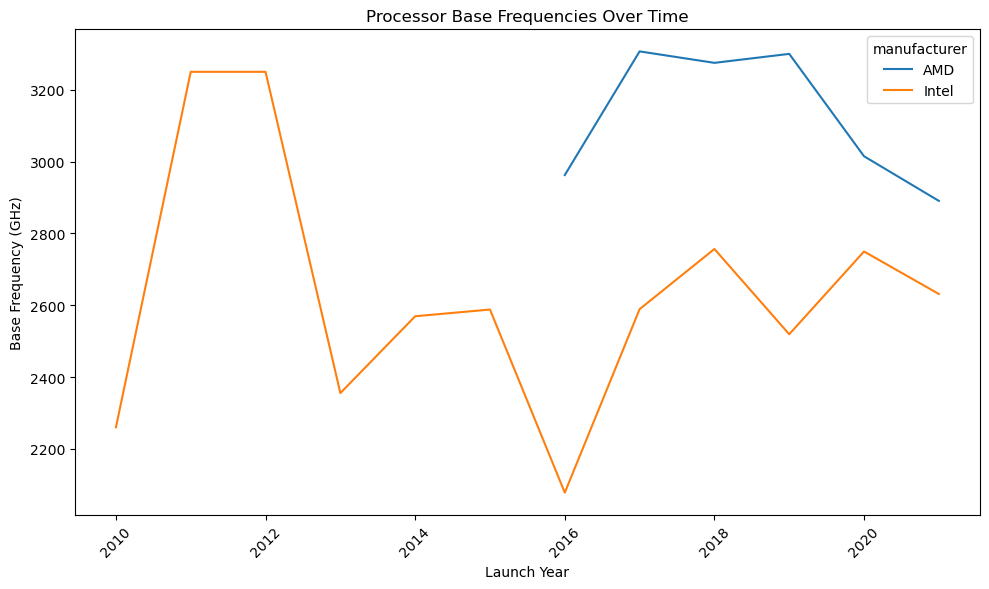

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Load data
amd_processors = pd.read_csv('amd_processors.csv')
intel_processors = pd.read_csv('intel_processors.csv')

# Prepare AMD processors data
amd_proc = amd_processors.copy()
amd_proc['manufacturer'] = 'AMD'
amd_proc['launch_year'] = pd.to_datetime(amd_proc['launch_date'], errors='coerce').dt.year
amd_proc['cache'] = amd_proc['cache_l3']

# Prepare Intel processors data
intel_proc = intel_processors.copy()
intel_proc['manufacturer'] = 'Intel'
intel_proc['launch_year'] = pd.to_datetime(intel_proc['launch_date'], errors='coerce').dt.year
intel_proc['cache'] = intel_proc['cache_size']

# Combine AMD and Intel data
combined_proc = pd.concat([amd_proc, intel_proc], ignore_index=True)

# Clean numeric columns
numeric_columns = ['base_frequency', 'tdp', 'cores', 'threads', 'cache']
for col in numeric_columns:
    combined_proc[col] = pd.to_numeric(combined_proc[col], errors='coerce')

# --- Plot 1: Line chart of base frequency over time ---
line_data = combined_proc.dropna(subset=['base_frequency', 'launch_year'])
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(
    data=line_data,
    x='launch_year',
    y='base_frequency',
    hue='manufacturer',
    errorbar=None
)
line_plot.set_title('Processor Base Frequencies Over Time')
line_plot.set_xlabel('Launch Year')
line_plot.set_ylabel('Base Frequency (GHz)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

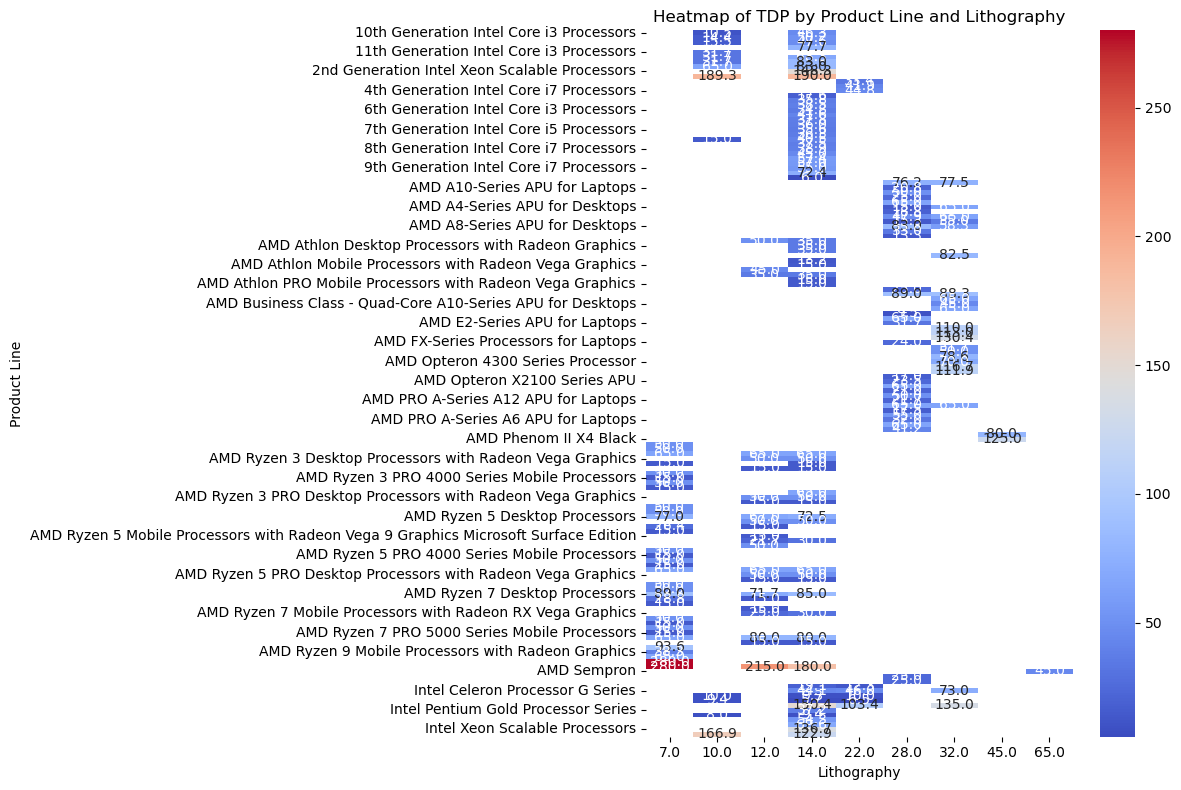

In [2]:
# --- Plot 2: Heatmap of TDP by Product Line and Lithography ---
heatmap_data = combined_proc.dropna(subset=['tdp', 'product_line', 'lithography'])
heatmap_pivot = heatmap_data.pivot_table(
    index='product_line',
    columns='lithography',
    values='tdp',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of TDP by Product Line and Lithography')
plt.xlabel('Lithography')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

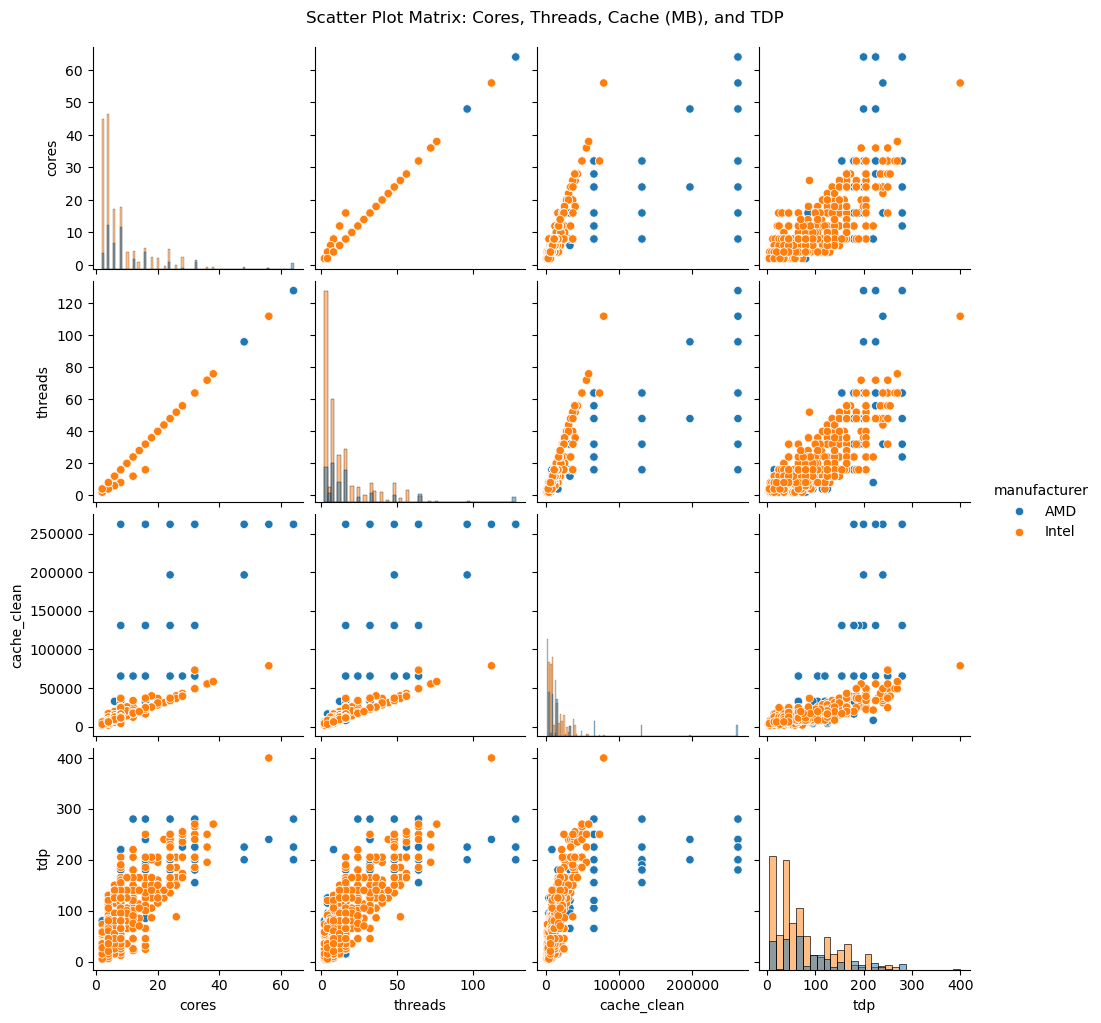

In [3]:
# --- Plot 3: Scatter plot matrix (pairplot) ---
# Function to extract numeric value from cache string (assumes MB units)
def parse_cache(cache_str):
    if pd.isna(cache_str):
        return np.nan
    match = re.search(r'(\d+(\.\d+)?)', str(cache_str))
    if match:
        return float(match.group(1))
    else:
        return np.nan

# Apply cache cleaning
combined_proc['cache_clean'] = combined_proc['cache'].apply(parse_cache)

# Prepare scatter data
scatter_data = combined_proc.dropna(subset=['cores', 'threads', 'cache_clean', 'tdp'])

# Pairplot with histograms on the diagonal
scatter_plot = sns.pairplot(
    scatter_data,
    vars=['cores', 'threads', 'cache_clean', 'tdp'],
    hue='manufacturer',
    diag_kind='hist'
)
scatter_plot.fig.suptitle('Scatter Plot Matrix: Cores, Threads, Cache (MB), and TDP', y=1.02)
plt.show()